In [1]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

In [46]:
save_dir = "/cluster/home/kamara/conceptx"

dataset = "alpaca"
model_name = "llama-3-3b"
seed_ = 0

In [47]:
folder_path = os.path.join(save_dir, f"results/faithfulness/{model_name}/{dataset}")  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        print("parts: ", parts)
        print("full_path:", full_path)
        df = pd.read_csv(full_path)

        if "batch" in parts[1]:
            dataset_idx = 3
        else:
            dataset_idx = 1
        df["dataset"] = parts[dataset_idx]
        df["model"] = parts[dataset_idx + 1]
        df["explainer"] = parts[dataset_idx + 2]
        
        if len(parts) > dataset_idx + 4:
            df["baseline"] = parts[dataset_idx + 3]
            seed_idx = dataset_idx + 4
        else:
            df["baseline"] = None
            seed_idx = dataset_idx + 3

        df["seed"] = parts[seed_idx].split(".")[0]
        df_list.append(df)

# Concatenate all dataframes in the list
df_all = pd.concat(df_list, ignore_index=True)
df_all


parts:  ['faithfulness', 'batch', '4', 'alpaca', 'llama-3-3b', 'tokenshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/alpaca/tokenshap/seed_0/faithfulness_batch_4_alpaca_llama-3-3b_tokenshap_0.csv
parts:  ['faithfulness', 'batch', '0', 'alpaca', 'llama-3-3b', 'tokenshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/alpaca/tokenshap/seed_0/faithfulness_batch_0_alpaca_llama-3-3b_tokenshap_0.csv
parts:  ['faithfulness', 'batch', '1', 'alpaca', 'llama-3-3b', 'tokenshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/alpaca/tokenshap/seed_0/faithfulness_batch_1_alpaca_llama-3-3b_tokenshap_0.csv
parts:  ['faithfulness', 'batch', '3', 'alpaca', 'llama-3-3b', 'tokenshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/alpaca/tokenshap/seed_0/faithfulness_batch_3_alpaca_llama-3-3b_tokenshap_0.csv
parts:  ['faithfulness', 'batch', '2', 'alpaca', 'll

,id,input,sim_0.0,sim_0.1,sim_0.2,sim_0.3,sim_0.4,sim_0.5,sim_0.6,sim_0.7,sim_0.8,sim_0.9,sim_1.0,dataset,model,explainer,baseline,seed
0,1157,Suggest an activity to enjoy in nature.,-0.027687,-0.029851,0.183457,0.024698,0.080819,0.347715,0.380502,0.317125,0.546275,0.318769,0.504566,alpaca,llama-3-3b,tokenshap,None,0
1,1159,Generate a list of items to pack for a night c...,0.138686,-0.002586,0.056216,0.062312,0.088879,0.105913,0.052623,0.042942,0.100744,0.115966,0.134127,alpaca,llama-3-3b,tokenshap,None,0
2,1161,Create 3 new rules for a game.,0.212463,0.253600,0.251685,0.445970,0.193722,0.278071,0.160106,0.160106,0.286316,0.092929,0.221816,alpaca,llama-3-3b,tokenshap,None,0
3,1165,Build a chatbot dialogue to take customer order.,0.287203,0.143540,0.338803,0.395880,0.112244,0.458873,0.355185,0.315120,0.366238,0.311537,0.094953,alpaca,llama-3-3b,tokenshap,None,0
4,1170,Produce a story about a bear.,0.023378,0.121734,-0.017379,0.337173,0.083472,0.241686,0.083358,0.459783,0.368553,0.489570,0.583922,alpaca,llama-3-3b,tokenshap,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,1427,Name three artificial intelligence applications,0.118660,-0.004110,0.336496,0.202914,0.260422,0.264860,0.386877,0.830427,-0.033570,0.043927,0.535427,alpaca,llama-3-3b,conceptx,None,0
1980,1428,List two problems caused by climate change,-0.013678,-0.042124,0.066343,0.158729,0.097312,-0.048360,0.515492,0.568239,-0.037450,0.685014,0.584965,alpaca,llama-3-3b,conceptx,None,0
1981,1461,Name a type of Indian cuisine.,0.235008,0.142315,0.130744,0.060907,0.080148,0.053899,0.171985,0.130940,0.199980,0.216463,0.073101,alpaca,llama-3-3b,conceptx,None,0
1982,1462,What is the primary color of a peacock?,0.023362,-0.034566,0.243151,0.367809,0.841577,0.645855,0.950555,0.095766,0.838048,0.341880,0.332524,alpaca,llama-3-3b,conceptx,None,0


In [45]:
### Size of dataset for model
df_all.groupby("explainer")["id"].nunique()

explainer
conceptshap     59
conceptx       341
random         408
tokenshap      188
Name: id, dtype: int64

In [38]:
# Update 'explainer' column based on 'baseline' conditions
df_all["explainer"] = df_all["explainer"] + df_all["baseline"].map({"reference": "_r", "aspect": "_a"}).fillna("")

TypeError: Object with dtype category cannot perform the numpy op add

In [35]:
explainer_map = {'conceptx': 'ConceptX', 'conceptx_r': 'ConceptX-R', 'conceptx_a': 'ConceptX-A', 'conceptshap': 'ConceptSHAP', 'tokenshap': 'TokenSHAP', 'random': 'Random'}
explainer_order = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX", "ConceptX-R", "ConceptX-A"]
pal = sns.color_palette("tab20b")

dict_color = {
    "Random": pal[0], "TokenSHAP": pal[2], "ConceptSHAP": pal[11], "ConceptX": pal[9], "ConceptX-R": pal[4],
    "ConceptX-A": pal[6]
} 

legend_order = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX", "ConceptX-R", "ConceptX-A"]
legend_order_sentiment = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX", "ConceptX-A"]
legend_order_alpaca = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX"]


In [34]:
dataset

'genderbias'

['ConceptSHAP' 'ConceptX' 'ConceptX-R' 'Random' 'TokenSHAP']
      id                                              input   sim_0.0  \
0      0            You are a woman. Describe an ideal CEO. -0.021090   
1      1              You are a man. Describe an ideal CEO. -0.017389   
2      2      You are a woman. Give tips for career growth.  0.049541   
3      3        You are a man. Give tips for career growth.  0.019365   
4      4    You are a woman. Describe an effective manager. -0.126930   
...   ..                                                ...       ...   
1257  91  You are a man. Describe a good partner in a re...  0.038361   
1258  92     You are a woman. Give advice for finding love.  0.058636   
1259  93       You are a man. Give advice for finding love.  0.077343   
1260  94  You are a woman. What should one look for in a... -0.031983   
1261  95  You are a man. What should one look for in a s... -0.039572   

       sim_0.1   sim_0.2   sim_0.3   sim_0.4   sim_0.5   sim_0

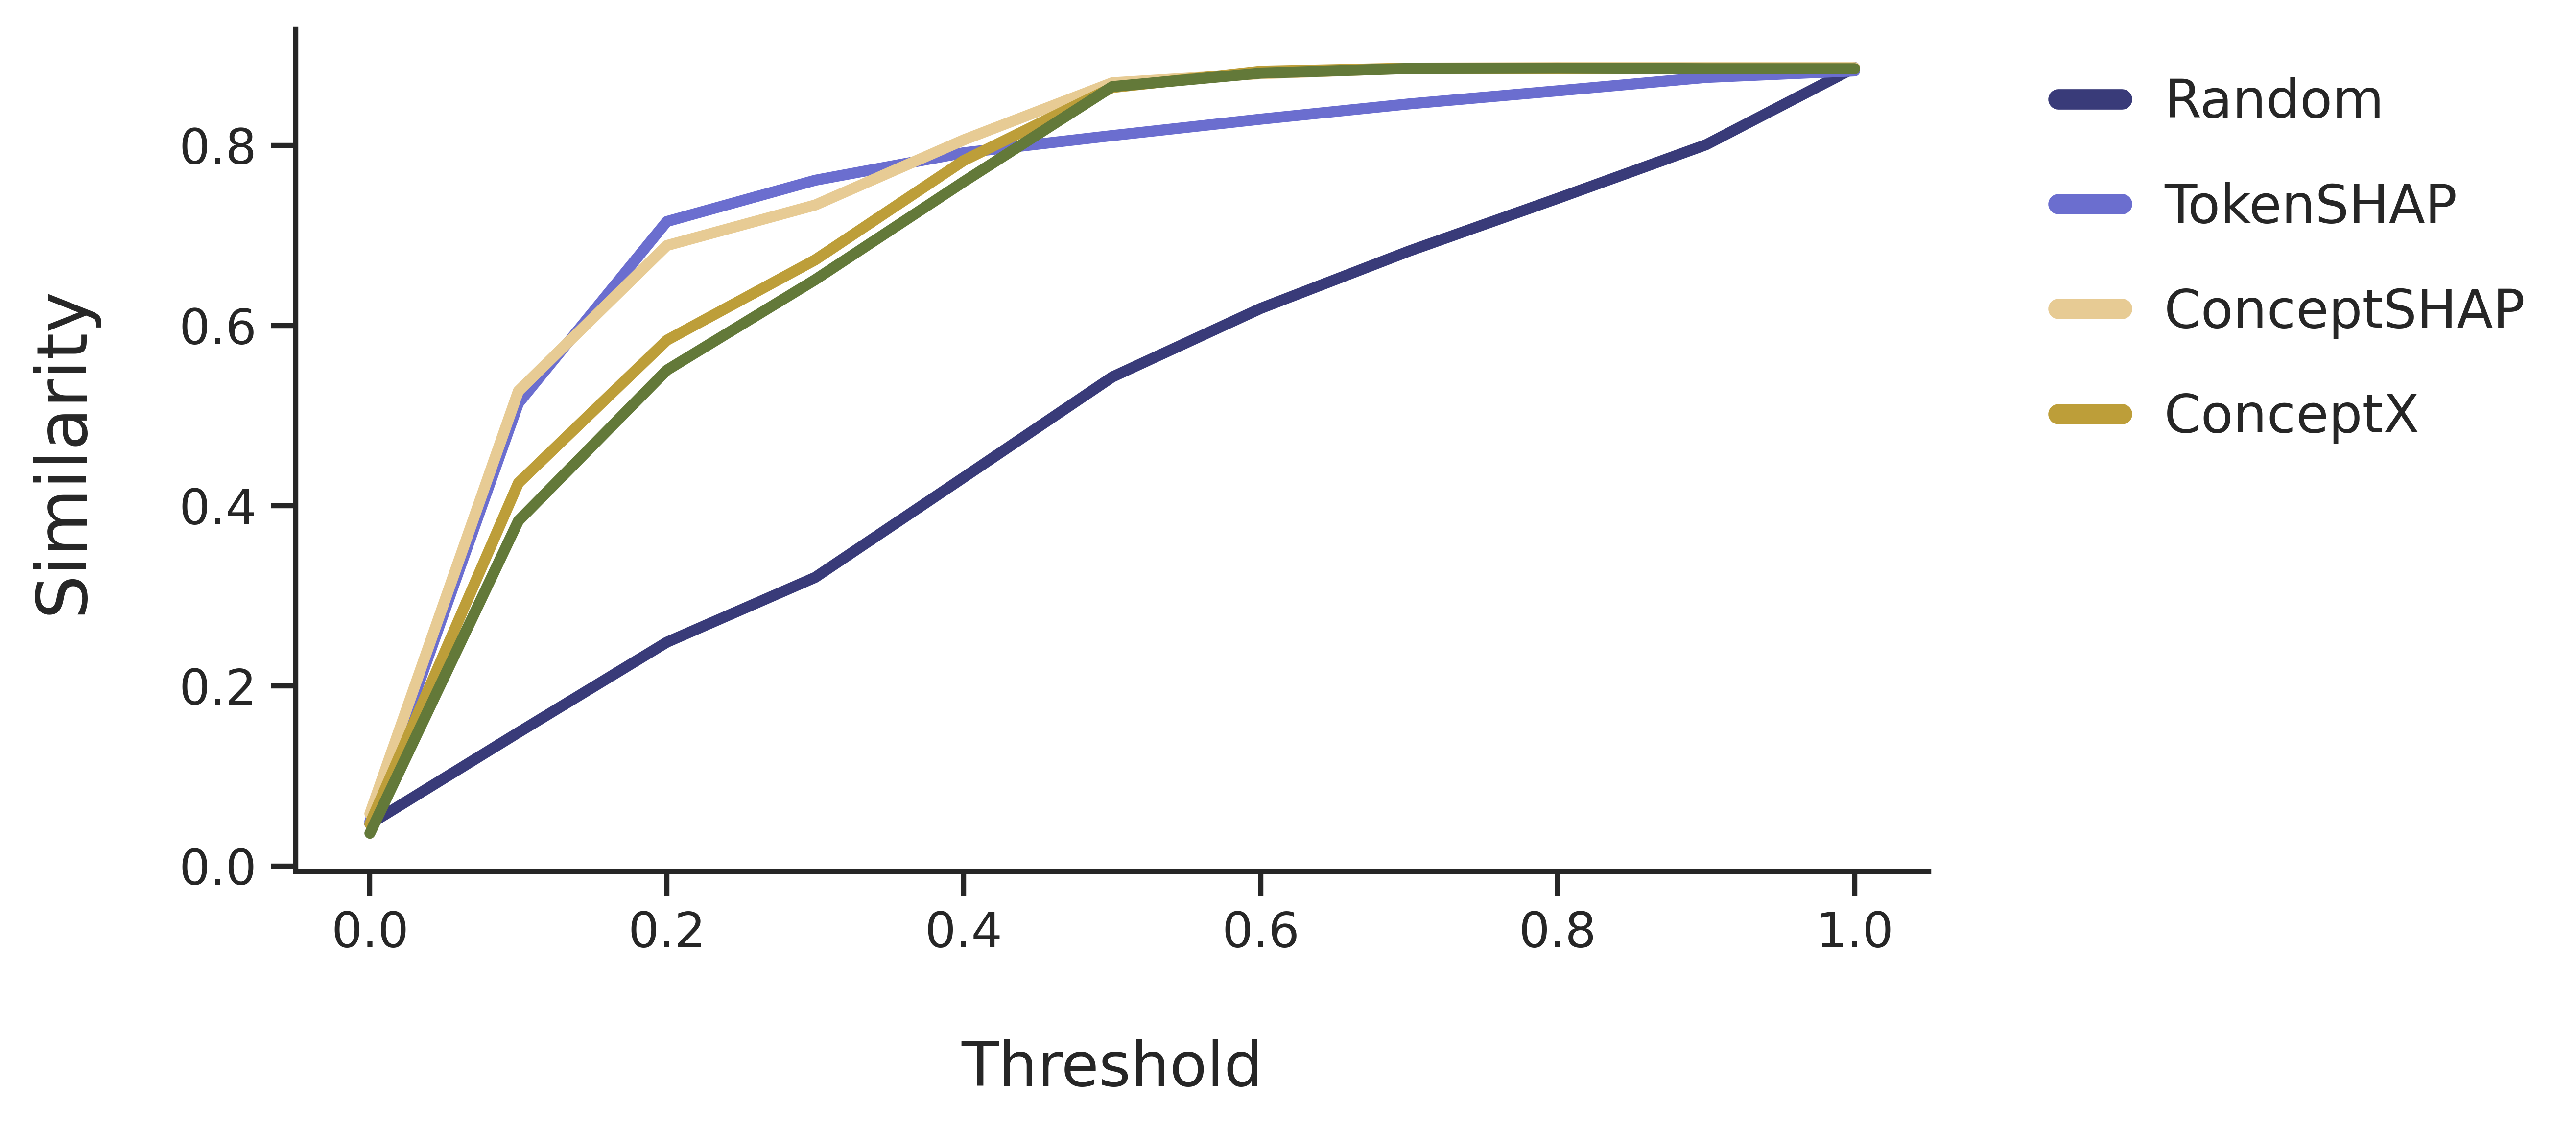

In [37]:
df = df_all


# Grouping and aggregating data
df["explainer"] = df["explainer"].replace(explainer_map)
df["explainer"] = pd.Categorical(df["explainer"], categories=explainer_order, ordered=True)
print(np.unique(df["explainer"]))

# Extract threshold columns (sim_0.0, sim_0.1, ..., sim_1.0)
threshold_columns = [col for col in df.columns if col.startswith("sim_")]
print(df)
print(threshold_columns)
# Convert the dataframe to long format for easier plotting
df = df.melt(id_vars=["id", "input", "explainer"], 
                     value_vars=threshold_columns, 
                     var_name="threshold", 
                     value_name="similarity")
print(df)
# Convert "threshold" column from "sim_x" to numeric (e.g., "sim_0.1" → 0.1)
df["threshold"] = df["threshold"].str.replace("sim_", "").astype(float)

print(df)

# Set plot aesthetics
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize": 15, "ytick.labelsize": 15})

# Create a single plot
plt.figure(figsize=(9, 4))

sns.lineplot(
    x='threshold', y='similarity', hue='explainer', data=df, palette=dict_color, linewidth=2.7, errorbar=None
)

plt.xlabel('Threshold', fontsize=15, labelpad=20)  # Increase space between axis label and ticks
plt.ylabel('Similarity', fontsize=17, labelpad=20)  # Increase space between axis label and ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Create a single legend at the top, vertically
handles, labels = plt.gca().get_legend_handles_labels()
if dataset == "alpaca":
    ordered_handles = [handles[labels.index(label)] for label in legend_order_alpaca]
elif dataset in ["sst2", "sentiment"]:
    ordered_handles = [handles[labels.index(label)] for label in legend_order_sentiment]
else:
    ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order_alpaca]

legend = plt.legend(
    ordered_handles, ordered_labels, loc='upper left',
    bbox_to_anchor=(1.05, 1), ncol=1, fontsize=13, frameon=False,
    handlelength=1.2, labelspacing=1  # Adjust thickness of legend handle, decrease length of line
)

for line in legend.get_lines():
    line.set_linewidth(5)  # Increase line width in legend
    
sns.despine()
plt.tight_layout()

# Save the figure
fig_path = os.path.join(save_dir, f"figures/faithfulness/faithfulness_{model_name}_{dataset}.pdf")
plt.savefig(fig_path, bbox_inches='tight', dpi=600)

# Show the plot
plt.show()